In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

In [ ]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

In [ ]:
# Load Fashion-MNIST dataset
train_dataset = torchvision.datasets.FashionMNIST(root="./data", train=True, transform=transform, download=True)
test_dataset = torchvision.datasets.FashionMNIST(root="./data", train=False, transform=transform, download=True)


100%|██████████| 26.4M/26.4M [00:02<00:00, 11.7MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 185kB/s]
100%|██████████| 4.42M/4.42M [00:01<00:00, 3.59MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 17.3MB/s]


In [ ]:
image, label = train_dataset[0]
print(image.shape)
print(len(train_dataset))

torch.Size([1, 28, 28])
60000


In [ ]:
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)



In [ ]:
class CNNClassifier(nn.Module):
    def __init__(self):
        super(CNNClassifier, self).__init__()

        # Convolution Layers
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)

        # Pooling
        self.pool = nn.MaxPool2d(2, 2)

        # Fully Connected Layers
        self.fc1 = nn.Linear(64 * 7 * 7, 128)
        self.fc2 = nn.Linear(128, 10)

        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.25)

    def forward(self, x):

        x = self.pool(self.relu(self.conv1(x)))   # 28x28 → 14x14
        x = self.pool(self.relu(self.conv2(x)))   # 14x14 → 7x7

        x = x.view(x.size(0), -1)                 # Flatten

        x = self.dropout(self.relu(self.fc1(x)))
        x = self.fc2(x)

        return x

In [ ]:
from torchsummary import summary

# Initialize model
model = CNNClassifier()

# Move model to GPU if available
if torch.cuda.is_available():
    device = torch.device("cuda")
    model.to(device)

# Print model summary
print('Name: Rithika K       ')
print('Register Number: 212224230230      ')
summary(model, input_size=(1, 28, 28))


Name: Rithika K       
Register Number: 212224230230      
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 28, 28]             320
              ReLU-2           [-1, 32, 28, 28]               0
         MaxPool2d-3           [-1, 32, 14, 14]               0
            Conv2d-4           [-1, 64, 14, 14]          18,496
              ReLU-5           [-1, 64, 14, 14]               0
         MaxPool2d-6             [-1, 64, 7, 7]               0
            Linear-7                  [-1, 128]         401,536
              ReLU-8                  [-1, 128]               0
           Dropout-9                  [-1, 128]               0
           Linear-10                   [-1, 10]           1,290
Total params: 421,642
Trainable params: 421,642
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backw

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = CNNClassifier().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [16]:
def train_model(model, train_loader, num_epochs=3):

    model.train()

    for epoch in range(num_epochs):
        running_loss = 0.0

        for images, labels in train_loader:

            images, labels = images.to(device), labels.to(device)

            optimizer.zero_grad()

            outputs = model(images)
            loss = criterion(outputs, labels)

            loss.backward()
            optimizer.step()

            running_loss += loss.item()

        print('Name: Rithika K')
        print('Register Number:212224230230')
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader):.4f}')

In [19]:
 #Train the model
train_model(model, train_loader)


Name: Rithika K
Register Number:212224230230
Epoch [1/3], Loss: 0.1999
Name: Rithika K
Register Number:212224230230
Epoch [2/3], Loss: 0.1808
Name: Rithika K
Register Number:212224230230
Epoch [3/3], Loss: 0.1631


In [25]:
def test_model(model, test_loader):
    model.eval()
    correct = 0
    total = 0
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for images, labels in test_loader:
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            all_preds.extend(predicted.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    accuracy = correct / total
    print('Name:Rithika K    ')
    print('Register Number:  212224230230     ')
    print(f'Test Accuracy: {accuracy:.4f}')

In [26]:
all_preds = []
all_labels = []

with torch.no_grad():
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        all_preds.extend(predicted.numpy())
        all_labels.extend(labels.numpy())

cm = confusion_matrix(all_labels, all_preds)
print(cm)

[[889   1  11  16   2   0  72   0   9   0]
 [  1 984   1   8   4   0   0   0   2   0]
 [ 21   1 880   5  33   0  59   0   1   0]
 [ 19   5  18 921  12   0  24   0   1   0]
 [  2   0  79  36 790   0  92   0   1   0]
 [  0   0   0   0   0 988   0   8   1   3]
 [130   2  66  34  35   0 722   0  11   0]
 [  0   0   0   0   0  15   0 936   0  49]
 [  3   0   0   3   1   3   4   1 984   1]
 [  0   0   0   0   0   3   0  20   1 976]]


In [27]:
test_model(model, test_loader)

Name:Rithika K    
Register Number:  212224230230     
Test Accuracy: 0.9142


In [29]:
print(classification_report(all_labels, all_preds))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1000
           1       0.99      0.98      0.99      1000
           2       0.83      0.88      0.86      1000
           3       0.90      0.92      0.91      1000
           4       0.90      0.79      0.84      1000
           5       0.98      0.99      0.98      1000
           6       0.74      0.72      0.73      1000
           7       0.97      0.94      0.95      1000
           8       0.97      0.98      0.98      1000
           9       0.95      0.98      0.96      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



In [31]:
def predict_image(model, image_index, dataset):
    model.eval()

    image, label = dataset[image_index]
    image = image.to(device)

    with torch.no_grad():
        output = model(image.unsqueeze(0))  # Add batch dimension
        _, predicted = torch.max(output, 1)

    class_names = dataset.classes

    print('Name: Rithika')
    print('Register Number: XXXXXXXX')

    plt.imshow(image.cpu().squeeze(), cmap="gray")
    plt.title(f'Actual: {class_names[label]}\nPredicted: {class_names[predicted.item()]}')
    plt.axis("off")
    plt.show()

    print(f'Actual: {class_names[label]}')
    print(f'Predicted: {class_names[predicted.item()]}')

Name: Rithika
Register Number: XXXXXXXX


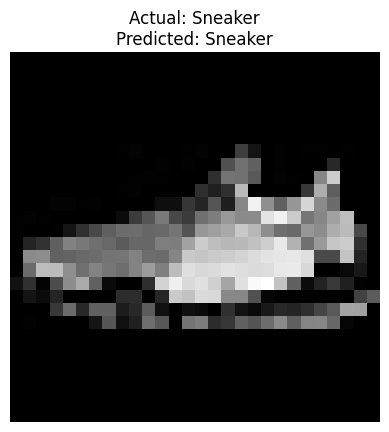

Actual: Sneaker
Predicted: Sneaker


In [33]:

# Example Prediction
predict_image(model, image_index=70, dataset=test_dataset)